<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Gemstone_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c playground-series-s3e8
! unzip '/content/playground-series-s3e8.zip' -d '/content/gemstones'

In [ ]:
! pip install pycaret

In [5]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [16]:
ds_df = pd.read_csv("/content/gemstones/train.csv")


In [17]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [18]:
ds_df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [19]:
ds_df.corr().round(2)

,id,carat,depth,table,x,y,z,price
id,1.0,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
carat,-0.0,1.00,0.03,0.23,0.98,0.98,0.97,0.94
depth,0.0,0.03,1.00,-0.23,-0.01,-0.01,0.08,0.00
table,0.0,0.23,-0.23,1.00,0.24,0.23,0.21,0.17
x,-0.0,0.98,-0.01,0.24,1.00,1.00,0.99,0.90
y,-0.0,0.98,-0.01,0.23,1.00,1.00,0.99,0.90
z,0.0,0.97,0.08,0.21,0.99,0.99,1.00,0.89
price,-0.0,0.94,0.00,0.17,0.90,0.90,0.89,1.00



# II. Preprocessing

In [20]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [21]:
reg_models = setup(
    data=train_df, target='price', session_id=123,
    ignore_features=['id'])


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(154858, 11)"
4,Transformed data shape,"(154858, 27)"
5,Transformed train set shape,"(108400, 27)"
6,Transformed test set shape,"(46458, 27)"
7,Ignore features,1
8,Numeric features,6
9,Categorical features,3


In [22]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,303.8586,342980.4326,585.6084,0.9790,0.1136,0.0861,1.3640
xgboost,Extreme Gradient Boosting,306.5597,360467.1825,600.3754,0.9779,0.1115,0.0830,14.5060
rf,Random Forest Regressor,313.1122,379358.7834,615.8827,0.9767,0.1131,0.0829,53.1420
et,Extra Trees Regressor,321.3191,399239.6612,631.8468,0.9755,0.1156,0.0848,48.6380
gbr,Gradient Boosting Regressor,374.6929,474643.4863,688.9177,0.9709,0.1593,0.1146,12.0200
knn,K Neighbors Regressor,414.3131,628590.3479,792.7553,0.9615,0.1543,0.1147,13.8560
dt,Decision Tree Regressor,425.5233,700715.8022,837.0628,0.9570,0.1518,0.1102,1.7020
ridge,Ridge Regression,626.1801,909280.3081,953.5091,0.9443,0.5331,0.3231,0.2760
br,Bayesian Ridge,626.0797,909324.7392,953.5324,0.9443,0.5328,0.3231,1.0520
llar,Lasso Least Angle Regression,624.5693,909776.6792,953.7662,0.9442,0.5342,0.3187,0.2920


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

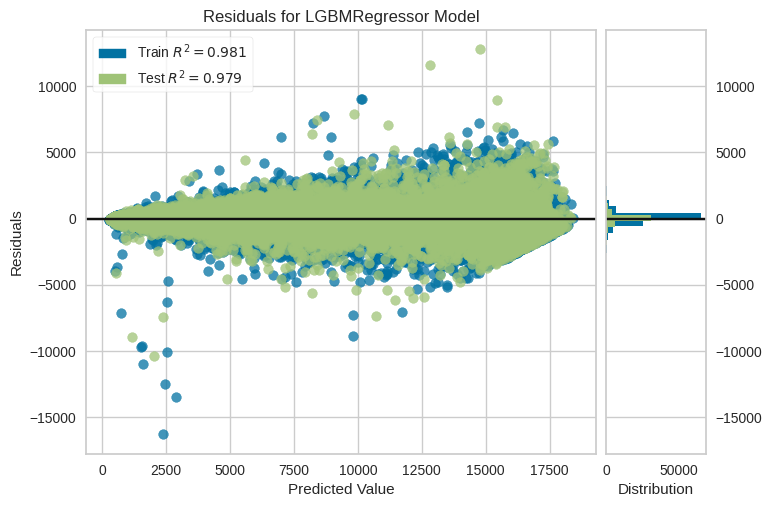

In [23]:
plot_model(best_model)